# Read the dataset CustomerChurn

In [1]:
import pandas as pd
import numpy as np

OriginalCustomerChurn = pd.read_csv("CustomerChurn.csv")
OriginalCustomerChurn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Preprocess Data with encoding

## Function GetEncodeData

In [2]:
from sklearn.preprocessing import LabelEncoder
import copy

def getEncodeData(DataFrame, Columns):
    labelEncoder = LabelEncoder()
    encodedData = copy.deepcopy(DataFrame)
    for column in Columns:
        encodedData[column] = labelEncoder.fit_transform(DataFrame[column])
    return encodedData

## Preprocess Data

In [3]:
encodedData = getEncodeData(OriginalCustomerChurn, ['State', 'International plan', 'Voice mail plan'])
encodedData.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Create train data and test data

## SplitDataFrameToTrainAndTest function

In [4]:
def SplitDataFrameToTrainAndTest(DataFrame, TrainDataRate, TargetAtt):
    training = DataFrame.sample(frac=TrainDataRate, random_state=1)
    testing = DataFrame.loc[~DataFrame.index.isin(training.index)]
    x_train = training.drop(TargetAtt, 1)
    y_train = training[TargetAtt]
    x_test = testing.drop(TargetAtt, 1)
    y_test = testing[TargetAtt]
    return x_train, y_train, x_test, y_test

## Train data and test data

In [5]:
x_train, y_train, x_test, y_test = SplitDataFrameToTrainAndTest(DataFrame=encodedData, TrainDataRate=0.6, TargetAtt='Churn')

# RandomForest Learning

##  Declaration

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def RandomForestLearning(DataTrain, TargetTrain):
    rf = RandomForestClassifier()
    rf.fit(DataTrain, TargetTrain)
    return rf

def RandomForestTesting(RFModel, DataTest, TargetTest):
    PredictTestRF = RFModel.predict(DataTest)
    AccuracyRF = accuracy_score(TargetTest, PredictTestRF)
    return AccuracyRF, PredictTestRF

## Training and Testing

In [7]:
rfModel = RandomForestLearning(x_train, y_train)
accuracy, predictTest = RandomForestTesting(rfModel, x_test, y_test)
print('Accuracy: ', accuracy)
print('Predict: ', predictTest)

Accuracy:  0.9392348087021756
Predict:  [False False False ... False  True False]


C:\Users\xuant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
RFRegressorModel = RandomForestRegressor(random_state= 1, max_depth= 10)
RFRegressorModel.fit(x_train, y_train)

C:\Users\xuant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [28]:
RFRegressorModel.feature_importances_

array([0.01565064, 0.01441812, 0.00467682, 0.07986064, 0.02823744,
       0.03937743, 0.13720885, 0.02013832, 0.13507671, 0.06723363,
       0.01722386, 0.07449385, 0.02382132, 0.03038056, 0.02969631,
       0.06128489, 0.07576706, 0.04072794, 0.10472562])

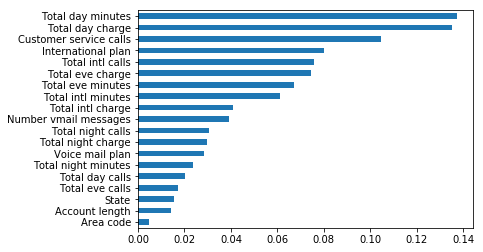

In [27]:
feat_importances = pd.Series(RFRegressorModel.feature_importances_, index=x_train.columns).sort_values()
feat_importances.plot(kind='barh')

In [33]:
mapped = zip(x_train.columns, RFRegressorModel.feature_importances_)
mapped = set(mapped)
display(mapped)

{('Account length', 0.014418124952522421),
 ('Area code', 0.0046768209412359025),
 ('Customer service calls', 0.10472561542210537),
 ('International plan', 0.07986063666996161),
 ('Number vmail messages', 0.0393774251166503),
 ('State', 0.01565064002377705),
 ('Total day calls', 0.020138322706779576),
 ('Total day charge', 0.13507670788015635),
 ('Total day minutes', 0.13720885231216917),
 ('Total eve calls', 0.017223860385455942),
 ('Total eve charge', 0.07449385355154196),
 ('Total eve minutes', 0.06723362920390134),
 ('Total intl calls', 0.07576705755962682),
 ('Total intl charge', 0.04072793522355549),
 ('Total intl minutes', 0.061284893338492394),
 ('Total night calls', 0.03038055779046297),
 ('Total night charge', 0.029696312878524617),
 ('Total night minutes', 0.023821317976935215),
 ('Voice mail plan', 0.02823743606614555)}

In [46]:
def PrintTrainTestInformation(x_train, y_train, x_test, y_test):
    print("Train rows and colums: ", x_train.shape)
    print("Test rows and colums: ", x_test.shape)
    x_train_feselection02,y_train_feselection02,x_test_feselection02,y_test_feselection02 = SplitDataFrameToTrainAndTest(encodedData[AttSelection], 0.6, 'Churn')
    PrintTrainTestInformation(x_train_feselection02,y_train_feselection02,x_test_feselection02,y_test_feselection02)
    x_train = x_train_feselection02
    y_train = y_train_feselection02
    x_test  = x_test_feselection02
    y_test = y_test_feselection02
import time
start = time.time()

RFModel = RandomForestLearning(x_train,y_train)
end = time.time()
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel, x_test, y_test)
print('Random Forest Accuracy: {:.3f}'.format(RFAccuracy))
print('Time: ',end-start)

Random Forest Accuracy: 0.944
Time:  0.08078360557556152


C:\Users\xuant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
featureSelection = []
for name, item in feat_importances.iteritems():
    if (item > 0.03):
        featureSelection.append(name)
featureTrainSelection = x_train[featureSelection]
featureTestSelection = x_test[featureSelection]
display(featureTrainSelection.head())

,Total night calls,Number vmail messages,Total intl charge,Total intl minutes,Total eve minutes,Total eve charge,Total intl calls,International plan,Customer service calls,Total day charge,Total day minutes
2360,107,0,2.54,9.4,199.4,16.95,3,0,2,37.76,222.1
600,140,0,2.46,9.1,246.0,20.91,4,0,2,17.44,102.6
1501,81,0,3.43,12.7,107.9,9.17,2,0,0,46.31,272.4
1114,114,15,2.94,10.9,267.0,22.70,4,0,1,28.07,165.1
517,114,0,2.54,9.4,158.6,13.48,4,0,2,36.50,214.7


# KNN Learning

## Declaration

In [44]:
def KNNLearning(DataTrain, TargetTrain):
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(DataTrain, TargetTrain)
    return KNN

def KNNTesting(RFModel, DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTestKNN = RFModel.predict(DataTest)
    AccuracyKNN = accuracy_score(TargetTest, PredictTestKNN)
    return AccuracyKNN, PredictTestKNN

## Training and Testing

In [45]:
rfModel = KNNLearning(x_train, y_train)
accuracy, predictTest = KNNTesting(rfModel, x_test, y_test)
print('Accuracy: ', accuracy)
print('Predict: ', predictTest)

Accuracy:  0.8634658664666166
Predict:  [False False False ... False False False]


# Neural Network

In [51]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [53]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.38289267,  0.1038509 ,  0.45557177,  0.04415339, -0.48689538,
          0.42513138,  0.08291781,  0.37218356,  0.3609177 , -0.13142827,
         -0.25899947, -0.50080544],
        [-0.02342466, -0.00763321, -0.04668298,  0.3663292 , -0.26699293,
         -0.27130866, -0.00607723,  0.2702278 ,  0.35820252,  0.19963783,
         -0.3742559 ,  0.19571906],
        [ 0.25894904,  0.26406986,  0.45465374, -0.36857003,  0.25091583,
          0.23204654,  0.43381155, -0.23779461,  0.41992342,  0.4767384 ,
         -0.26995018,  0.07601684],
        [ 0.17224836,  0.27682304, -0.0299204 ,  0.23568124,  0.2225244 ,
          0.20749402,  0.42920554,  0.14901364,  0.40105844,  0.00536996,
          0.46754414, -0.3439737 ],
        [ 0.41333097, -0.43051767, -0.27394313, -0.11671683,  0.03223932,
          0.12114692,  0.41824096, -0.12707925, -0.49652156,  0.01699102,
          0.50407344, -0.3412814 ],
        [-0.16554925, -0.5102714 , -0.43046921,  0.15786439, -0.25161391,
      

In [65]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(featureTrainSelection, y_train,epochs=500, batch_size=15, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
2000/2000 [==============================] - 2s 1ms/step - loss: 1.9607 - acc: 0.8265
Epoch 2/500
2000/2000 [==============================] - 1s 376us/step - loss: 1.1479 - acc: 0.8155
Epoch 3/500
2000/2000 [==============================] - 1s 387us/step - loss: 0.6152 - acc: 0.8350
Epoch 4/500
2000/2000 [==============================] - 1s 380us/step - loss: 0.4937 - acc: 0.8400
Epoch 5/500
2000/2000 [==============================] - 1s 403us/step - loss: 0.4764 - acc: 0.8420
Epoch 6/500
2000/2000 [==============================] - 1s 386us/step - loss: 0.4463 - acc: 0.8475
Epoch 7/500
2000/2000 [==============================] - 1s 384us/step - loss: 0.4196 - acc: 0.8475
Epoch 8/500
2000/2000 [==============================] - 1s 407us/step - loss: 0.4250 - acc: 0.8570
Epoch 9/500
2000/2000 [==============================] - 1s 406us/step - loss: 0.4221 - acc: 0.8480
Epoch 10/500
2000/2000 [==============================

2000/2000 [==============================] - 1s 382us/step - loss: 0.3155 - acc: 0.8845
Epoch 80/500
2000/2000 [==============================] - 1s 446us/step - loss: 0.3098 - acc: 0.8830
Epoch 81/500
2000/2000 [==============================] - 1s 400us/step - loss: 0.3163 - acc: 0.8850
Epoch 82/500
2000/2000 [==============================] - 1s 369us/step - loss: 0.3156 - acc: 0.8800
Epoch 83/500
2000/2000 [==============================] - 1s 489us/step - loss: 0.3079 - acc: 0.8855
Epoch 84/500
2000/2000 [==============================] - 1s 475us/step - loss: 0.3262 - acc: 0.8745
Epoch 85/500
2000/2000 [==============================] - 1s 443us/step - loss: 0.3194 - acc: 0.8795
Epoch 86/500
2000/2000 [==============================] - 1s 418us/step - loss: 0.3133 - acc: 0.8860
Epoch 87/500
2000/2000 [==============================] - 1s 391us/step - loss: 0.3038 - acc: 0.8860
Epoch 88/500
2000/2000 [==============================] - 1s 455us/step - loss: 0.3222 - acc: 0.8870
Epo

2000/2000 [==============================] - 1s 412us/step - loss: 0.2916 - acc: 0.8920
Epoch 160/500
2000/2000 [==============================] - 1s 422us/step - loss: 0.2901 - acc: 0.8900
Epoch 161/500
2000/2000 [==============================] - 1s 392us/step - loss: 0.3023 - acc: 0.8880
Epoch 162/500
2000/2000 [==============================] - 1s 384us/step - loss: 0.2989 - acc: 0.8905
Epoch 163/500
2000/2000 [==============================] - 1s 363us/step - loss: 0.2934 - acc: 0.8910
Epoch 164/500
2000/2000 [==============================] - 1s 373us/step - loss: 0.2920 - acc: 0.8940
Epoch 165/500
2000/2000 [==============================] - 1s 477us/step - loss: 0.2905 - acc: 0.8930
Epoch 166/500
2000/2000 [==============================] - 1s 396us/step - loss: 0.2865 - acc: 0.8930
Epoch 167/500
2000/2000 [==============================] - 1s 373us/step - loss: 0.2917 - acc: 0.8930
Epoch 168/500
2000/2000 [==============================] - 1s 368us/step - loss: 0.2935 - acc: 0

2000/2000 [==============================] - 1s 368us/step - loss: 0.2737 - acc: 0.8905
Epoch 240/500
2000/2000 [==============================] - 1s 364us/step - loss: 0.2735 - acc: 0.8925
Epoch 241/500
2000/2000 [==============================] - 1s 361us/step - loss: 0.2708 - acc: 0.8955
Epoch 242/500
2000/2000 [==============================] - 1s 373us/step - loss: 0.2719 - acc: 0.8955
Epoch 243/500
2000/2000 [==============================] - 1s 366us/step - loss: 0.2856 - acc: 0.8910
Epoch 244/500
2000/2000 [==============================] - 1s 360us/step - loss: 0.2762 - acc: 0.8990
Epoch 245/500
2000/2000 [==============================] - 1s 374us/step - loss: 0.2731 - acc: 0.9010
Epoch 246/500
2000/2000 [==============================] - 1s 364us/step - loss: 0.2693 - acc: 0.8950
Epoch 247/500
2000/2000 [==============================] - 1s 383us/step - loss: 0.2717 - acc: 0.8960
Epoch 248/500
2000/2000 [==============================] - 1s 436us/step - loss: 0.2765 - acc: 0

2000/2000 [==============================] - 1s 395us/step - loss: 0.2630 - acc: 0.9060
Epoch 320/500
2000/2000 [==============================] - 1s 365us/step - loss: 0.2575 - acc: 0.9025
Epoch 321/500
2000/2000 [==============================] - 1s 370us/step - loss: 0.2630 - acc: 0.9030
Epoch 322/500
2000/2000 [==============================] - 1s 389us/step - loss: 0.2588 - acc: 0.9030
Epoch 323/500
2000/2000 [==============================] - 1s 384us/step - loss: 0.2588 - acc: 0.9005
Epoch 324/500
2000/2000 [==============================] - 1s 394us/step - loss: 0.2730 - acc: 0.8910
Epoch 325/500
2000/2000 [==============================] - 1s 391us/step - loss: 0.2596 - acc: 0.9075
Epoch 326/500
2000/2000 [==============================] - 1s 388us/step - loss: 0.2600 - acc: 0.9060
Epoch 327/500
2000/2000 [==============================] - 1s 380us/step - loss: 0.2541 - acc: 0.9035
Epoch 328/500
2000/2000 [==============================] - 1s 391us/step - loss: 0.2541 - acc: 0

2000/2000 [==============================] - 1s 361us/step - loss: 0.2514 - acc: 0.9055
Epoch 400/500
2000/2000 [==============================] - 1s 373us/step - loss: 0.2482 - acc: 0.9070
Epoch 401/500
2000/2000 [==============================] - 1s 372us/step - loss: 0.2577 - acc: 0.9115
Epoch 402/500
2000/2000 [==============================] - 1s 359us/step - loss: 0.2534 - acc: 0.9055
Epoch 403/500
2000/2000 [==============================] - 1s 373us/step - loss: 0.2515 - acc: 0.9035
Epoch 404/500
2000/2000 [==============================] - 1s 356us/step - loss: 0.2486 - acc: 0.9040
Epoch 405/500
2000/2000 [==============================] - 1s 371us/step - loss: 0.2499 - acc: 0.9060
Epoch 406/500
2000/2000 [==============================] - 1s 366us/step - loss: 0.2492 - acc: 0.9085
Epoch 407/500
2000/2000 [==============================] - 1s 364us/step - loss: 0.2460 - acc: 0.9070
Epoch 408/500
2000/2000 [==============================] - 1s 374us/step - loss: 0.2499 - acc: 0

2000/2000 [==============================] - 1s 434us/step - loss: 0.2455 - acc: 0.9145
Epoch 479/500
2000/2000 [==============================] - 1s 416us/step - loss: 0.2481 - acc: 0.9065
Epoch 480/500
2000/2000 [==============================] - 1s 373us/step - loss: 0.2402 - acc: 0.9085
Epoch 481/500
2000/2000 [==============================] - 1s 387us/step - loss: 0.2423 - acc: 0.9155
Epoch 482/500
2000/2000 [==============================] - 1s 375us/step - loss: 0.2428 - acc: 0.9070
Epoch 483/500
2000/2000 [==============================] - 1s 366us/step - loss: 0.2413 - acc: 0.9130
Epoch 484/500
2000/2000 [==============================] - 1s 366us/step - loss: 0.2442 - acc: 0.9125
Epoch 485/500
2000/2000 [==============================] - 1s 382us/step - loss: 0.2445 - acc: 0.9110
Epoch 486/500
2000/2000 [==============================] - 1s 381us/step - loss: 0.2433 - acc: 0.9090
Epoch 487/500
2000/2000 [==============================] - 1s 369us/step - loss: 0.2442 - acc: 0

In [69]:
model.save('pima-weights.best.hdf5')

In [71]:
model.evaluate(featureTestSelection, y_test, batch_size=150)

1333/1333 [==============================] - 0s 270us/step


[0.34276564769161794, 0.881470366787034]